In [2]:
# Run some setup code for this notebook.

import matplotlib.pyplot as plt
import numpy as np


# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load Dataset

In [3]:
import pandas as pd
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Dataset Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data Cleaning

In [5]:
df.drop("Loan_ID", axis=1, inplace=True)
# Checking the Missing Values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
################################################################################
# TODO:                                                                        #
# Task1 deal with NULL rows, you can either choose to drop them or replace them with mean or other value #
################################################################################
df['Gender'].fillna(df['Gender'].value_counts().idxmax(), inplace=True)
df['Married'].fillna(df['Married'].value_counts().idxmax(), inplace=True)
df['Dependents'].fillna(df['Dependents'].value_counts().idxmax(), inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].value_counts().idxmax(), inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].mean(skipna=True), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].value_counts().idxmax(), inplace=True)


################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [8]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


## Encode 

In [9]:
################################################################################
# TODO:                                                                        #
# Task2 deal with categorical features
# Tip use pd.get_dummies. 
################################################################################
df_dummies = pd.get_dummies(df, columns=['Gender','Married','Education','Self_Employed','Property_Area','Dependents'])
df_dummies

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,5849,0.0,146.412162,360.0,1.0,Y,0,1,1,0,...,0,1,0,0,0,1,1,0,0,0
1,4583,1508.0,128.000000,360.0,1.0,N,0,1,0,1,...,0,1,0,1,0,0,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,Y,0,1,0,1,...,0,0,1,0,0,1,1,0,0,0
3,2583,2358.0,120.000000,360.0,1.0,Y,0,1,0,1,...,1,1,0,0,0,1,1,0,0,0
4,6000,0.0,141.000000,360.0,1.0,Y,0,1,1,0,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,Y,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0
610,4106,0.0,40.000000,180.0,1.0,Y,0,1,0,1,...,0,1,0,1,0,0,0,0,0,1
611,8072,240.0,253.000000,360.0,1.0,Y,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
612,7583,0.0,187.000000,360.0,1.0,Y,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [10]:
df_dummies.loc[df_dummies["Loan_Status"] == 'Y', "Loan_Status"] = 1
df_dummies.loc[df_dummies["Loan_Status"] == 'N', "Loan_Status"] = 0

In [11]:
X = df_dummies[df_dummies.columns[~df_dummies.columns.isin(["Loan_Status"])]]
y = df_dummies.Loan_Status

In [12]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: object

## Data process

In [185]:
# Define the ratio of the training set (e.g., 80%)
train_ratio = 0.9

# Calculate the number of samples for the training set
train_size = int(len(X) * train_ratio)

# Create random indices for the training set
train_indices = np.random.choice(len(X), train_size, replace=False)

# Use the training indices to extract the training set
X_train = X.iloc[train_indices, :]
y_train = y.iloc[train_indices]

# Use the remaining indices for the test set
test_indices = [i for i in range(len(X)) if i not in train_indices]
X_test = X.iloc[test_indices, :]
y_test = y.iloc[test_indices]

In [169]:
X_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
162,3089,1280.0,121.0,360.0,0.0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0
540,4608,2845.0,140.0,180.0,1.0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0
52,4230,0.0,112.0,360.0,1.0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0
283,1811,1666.0,54.0,360.0,1.0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0
572,16666,0.0,275.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,3660,5064.0,187.0,360.0,1.0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0
482,2083,3150.0,128.0,360.0,1.0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0
149,4860,830.0,125.0,360.0,1.0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0
342,4554,1229.0,158.0,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0


In [170]:
y_train

162    0
540    1
52     0
283    1
572    1
      ..
440    1
482    1
149    1
342    1
592    1
Name: Loan_Status, Length: 491, dtype: object

In [186]:
a=np.array(X_train)
a=a.astype(int)

In [187]:
b=np.array(y_train)
b=b.astype(int)

## Train

[10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974, 10.887475041063974,

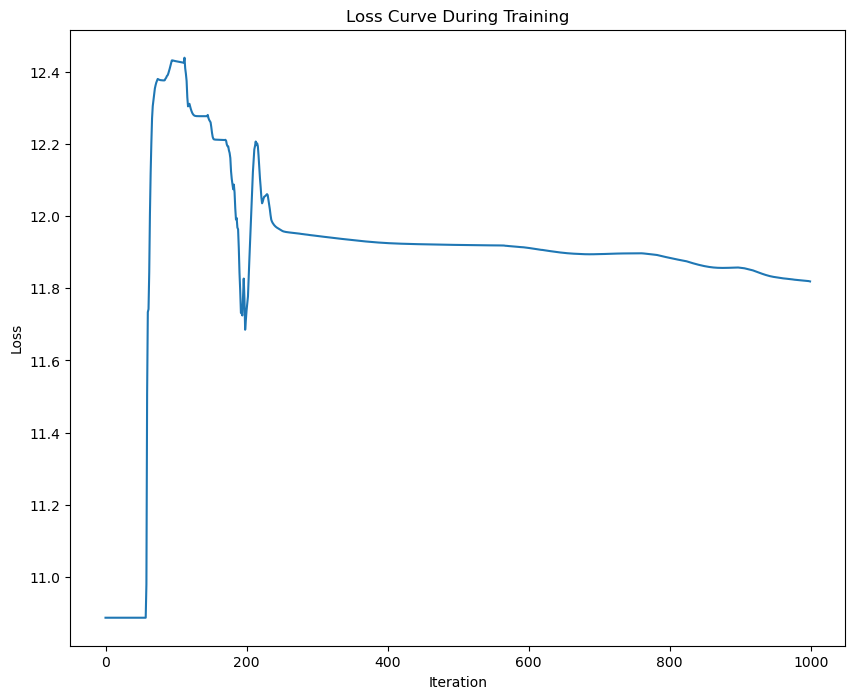

In [188]:
from Logistic import LogisticRegression
import matplotlib.pyplot as plt


################################################################################
# TODO:                                                                        #
# Task4 train your model and plot the loss curve of training
# You need to complete the Logistic.py file
# model = LogisticRegression()
################################################################################
model = LogisticRegression()
losses = model.fit(a, b)
probs=model.predict(a)

plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve During Training')
plt.show()
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

In [197]:
#定义一个求准确率的函数
def count_acc(X1,Y1):
    prob=model.predict(X1)
    for i in range(len(prob)):
        if prob[i]>0.5:
            prob[i]=1
        else: prob[i]=0
    count=0
    for i in range(len(prob)):
        if prob[i]==Y1[i]:
            count+=1
    return count/len(prob)

In [196]:
count_acc(a,b)

0.6268115942028986

## Test

In [ ]:
#处理测试集的数据
a1=np.array(X_test)
a1=a1.astype(int)
b1=np.array(y_test)
b1=b1.astype(int)

In [207]:
################################################################################
# TODO:                                                                        #
# Task5 compare the accuracy(or other metrics you want) of test data with different parameters you train with
################################################################################
learning_rates = [ 0.001, 0.005]
gammas = [ 0.1,0.4]
penalties = ["l1", "l2"]

results = []

for lr in learning_rates:
    for gamma in gammas:
        for penalty in penalties:
            model = LogisticRegression(penalty=penalty, gamma=gamma, fit_intercept=True)
            losses = model.fit(a1, b1, lr=lr, tol=1e-7, max_iter=1000)
            accuracy = count_acc(a1,b1)  # Calculate accuracy on the test data
            results.append({
                "Learning Rate": lr,
                "Gamma": gamma,
                "Penalty": penalty,
                "Accuracy": accuracy
            })


[10.043747868744127, 19.245134403035443, 10.045517724276737, 9.486983175142674, 9.486317306256097, 23.412562181102487, 9.48802567124062, 9.487359802354044, 9.310511205021283, 17.28496474130698, 9.486088899648529, 23.414198936456636, 10.044997291791034, 9.487665463780797, 11.715281955939094, 14.499921415381586, 9.486118767630954, 23.980005524618424, 10.044974332137068, 9.48774810645415, 13.633842449785956, 15.05720889331047, 10.043036604476233, 24.526518231336976, 10.044860139968316, 9.487624760979063, 13.943637221414916, 15.05884617222363, 10.042914660374818, 24.526466978687267, 10.04482562944974, 9.487502816877647, 13.999214351709485, 15.062831617718194, 15.056416701415834, 9.485193167419494, 24.52666559198865, 10.0444751082686, 9.486840126316476, 15.0568543665766, 9.485801468668194, 24.526473610979284, 10.044674651947366, 9.487448426264448, 15.057527150188296, 15.36949532131367, 8.92860992824252, 24.526424098752006, 10.044621520860169, 9.487344019396694, 15.057422743320542, 15.056805

[10.043747868744127, 24.53267769389083, 10.054343355216552, 9.495927723966515, 13.94907282449417, 9.491622963300543, 24.52993253910415, 10.057629138255054, 9.499857751281812, 13.95311892240417, 15.064262730376832, 8.934104815130459, 24.52990180939551, 10.057135323218633, 9.499363936245393, 14.510507712406014, 16.17800766954557, 10.047632948867005, 24.529535089971535, 10.057066697357104, 9.498778712029566, 13.952039883151924, 14.506093755764251, 8.376032569196509, 24.529969553264436, 10.056691157554814, 9.498366855890128, 15.06590897781031, 15.620277620225448, 15.61765042850866, 13.943677604716582, 10.043864109401305, 24.532661612317504, 10.054083021498624, 9.495395030161175, 14.506402698723463, 9.491155305915598, 24.530244117520418, 10.056827069606344, 9.499055682633102, 13.953077396652942, 15.064455335739027, 8.934234985529072, 24.530694150038627, 10.056333280584493, 9.499030533543069, 15.067218414594908, 15.621587057010046, 15.52697532562501, 14.406678533539374, 10.044316008464781, 2

In [208]:
results

[{'Learning Rate': 0.001,
  'Gamma': 0.1,
  'Penalty': 'l1',
  'Accuracy': 0.6612903225806451},
 {'Learning Rate': 0.001,
  'Gamma': 0.1,
  'Penalty': 'l2',
  'Accuracy': 0.5806451612903226},
 {'Learning Rate': 0.001,
  'Gamma': 0.4,
  'Penalty': 'l1',
  'Accuracy': 0.7258064516129032},
 {'Learning Rate': 0.001,
  'Gamma': 0.4,
  'Penalty': 'l2',
  'Accuracy': 0.7258064516129032},
 {'Learning Rate': 0.005, 'Gamma': 0.1, 'Penalty': 'l1', 'Accuracy': 0.5},
 {'Learning Rate': 0.005,
  'Gamma': 0.1,
  'Penalty': 'l2',
  'Accuracy': 0.6935483870967742},
 {'Learning Rate': 0.005,
  'Gamma': 0.4,
  'Penalty': 'l1',
  'Accuracy': 0.7096774193548387},
 {'Learning Rate': 0.005,
  'Gamma': 0.4,
  'Penalty': 'l2',
  'Accuracy': 0.7096774193548387}]